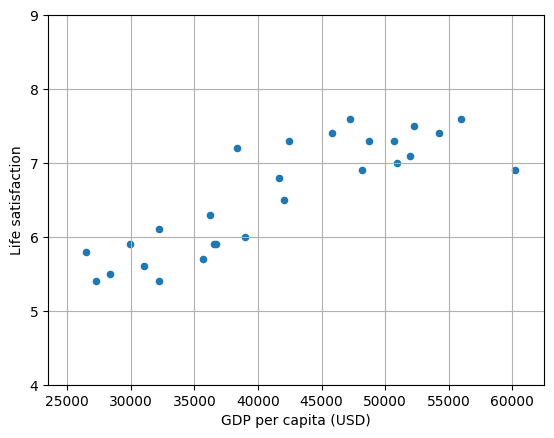

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Download and prepare the data
"""data_root = "https://github.com/ageron/data/raw/main/"
df = pd.read_csv(data_root + "lifesat/lifesat.csv")"""

df = pd.read_csv("data.csv")

# Features
X = df[["GDP per capita (USD)"]].values
y = df[["Life satisfaction"]].values

# Visualize the data
df.plot(kind='scatter', grid=True,
x="GDP per capita (USD)", y="Life satisfaction")
plt.axis([23_500, 62_500, 4, 9])
plt.show()


In [2]:
# Definindo nossas variáveis x e y
x = df['GDP per capita (USD)']
y = df['Life satisfaction']
n = len(df)

print(f"Número de amostras: {n}")

Número de amostras: 27


In [3]:
# PASSO 1: Calcular as médias (x̄ e ȳ)
x_bar = x.mean()
y_bar = y.mean()

print(f"Passo 1: Médias")
print(f"Média do PIB (x̄): {x_bar:.2f}")
print(f"Média da Satisfação (ȳ): {y_bar:.3f}")

Passo 1: Médias
Média do PIB (x̄): 41564.52
Média da Satisfação (ȳ): 6.567


## Cálculo da função 

$$\theta_1 = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2}$$


## Para o Intercepto

$$\theta_0 = \bar{y} - \theta_1 \bar{x}$$

In [4]:
# PASSO 2: Calcular os componentes da fórmula (Numerador e Denominador)

# Σ(x - x̄)(y - ȳ)
numerator = np.sum((x - x_bar) * (y - y_bar))
# E aqui a fórmula Σ(x - x̄)²
denominator = np.sum((x - x_bar)**2)

print(f"Passo 2: Componentes do Cálculo")
print(f"Numerador [Σ(x-x̄)(y-ȳ)]: {numerator:.2f}")
print(f"Denominador [Σ(x-x̄)²]: {denominator:.2f}")

Passo 2: Componentes do Cálculo
Numerador [Σ(x-x̄)(y-ȳ)]: 163499.38
Denominador [Σ(x-x̄)²]: 2411886717.88


In [5]:
# PASSO 3: Calcular a inclinação (θ₁)
theta_1 = numerator / denominator

print(f"Passo 3: Inclinação (θ₁)")
print(f"θ₁ = {numerator:.2f} / {denominator:.2f}")
print(f"θ₁ ≈ {theta_1:.8f}")

Passo 3: Inclinação (θ₁)
θ₁ = 163499.38 / 2411886717.88
θ₁ ≈ 0.00006779


In [6]:
# PASSO 4: Calcular o intercepto (θ₀)
theta_0 = y_bar - theta_1 * x_bar

print(f"Passo 4: Intercepto (θ₀)")
print(f"θ₀ = {y_bar:.3f} - ({theta_1:.8f} * {x_bar:.2f})")
print(f"θ₀ ≈ {theta_0:.3f}")

Passo 4: Intercepto (θ₀)
θ₀ = 6.567 - (0.00006779 * 41564.52)
θ₀ ≈ 3.749


In [7]:
# PASSO 5: Apresentar o resultado final
print("_"*60)
print("Resultado Final (Modelo de Regressão Linear):")
print(f"Satisfação = {theta_0:.2f} + ({theta_1:.8f}) * PIB")
print("_"*60)

____________________________________________________________
Resultado Final (Modelo de Regressão Linear):
Satisfação = 3.75 + (0.00006779) * PIB
____________________________________________________________


In [8]:
# --- Verificação Rápida com Scikit-Learn (o jeito profissional) ---
from sklearn.linear_model import LinearRegression

# Prepara os dados (Scikit-learn espera um array 2D para X)
X = x.values.reshape(-1, 1)
y_reshaped = y.values

# Cria e treina o modelo
model = LinearRegression()
model.fit(X, y_reshaped)

print("Verificação com a biblioteca Scikit-Learn:")
print(f"Intercepto (θ₀) do Scikit-Learn: {model.intercept_:.3f}")
print(f"Coeficiente (θ₁) do Scikit-Learn: {model.coef_[0]:.8f}")
print("Os valores bateram! Nosso cálculo manual está correto.")

Verificação com a biblioteca Scikit-Learn:
Intercepto (θ₀) do Scikit-Learn: 3.749
Coeficiente (θ₁) do Scikit-Learn: 0.00006779
Os valores bateram! Nosso cálculo manual está correto.


In [9]:
# Selecting a linear model and Training the model
model = LinearRegression()
model.fit(X, y)

print("Verificação com a biblioteca Scikit-Learn___________________")
print(f"Intercepto (θ₀) do Scikit-Learn: {model.intercept_:.3f}")
print(f"Coeficiente (θ₁) do Scikit-Learn: {model.coef_[0]:.8f}")
print("_"*60)

Verificação com a biblioteca Scikit-Learn___________________
Intercepto (θ₀) do Scikit-Learn: 3.749
Coeficiente (θ₁) do Scikit-Learn: 0.00006779
____________________________________________________________


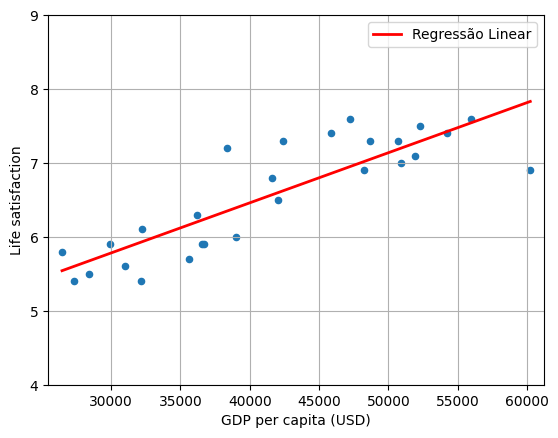

[6.30165767]


In [10]:
# Visualize the data first
df.plot(kind='scatter', grid=True,
x="GDP per capita (USD)", y="Life satisfaction")
plt.axis([df['GDP per capita (USD)'].min() - 1000, df['GDP per capita (USD)'].max() + 1000, 4, 9])

# Add the regression line based on actual data range
X_line = np.linspace(df['GDP per capita (USD)'].min(), df['GDP per capita (USD)'].max(), 100).reshape(-1, 1)
y_line = model.predict(X_line)
plt.plot(X_line, y_line, 'r-', linewidth=2, label='Regressão Linear')

plt.legend()
plt.show()

# Make a prediction for Cyprus
X_new = [[37_655.2]] 
print(model.predict(X_new))